In [2]:
import random
import numpy as np

from scipy import stats

import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt



# Manual T-test and F test

    X1  X2         Y  raw_residuals  group_means  fit_residuals
0    1   0  1.624345       1.257710    -0.097141       1.721486
1    1   0 -0.611756      -0.978392    -0.097141      -0.514616
2    1   0 -0.528172      -0.894807    -0.097141      -0.431031
3    1   0 -1.072969      -1.439604    -0.097141      -0.975828
4    1   0  0.865408       0.498772    -0.097141       0.962549
5    1   0 -2.301539      -2.668174    -0.097141      -2.204398
6    1   0  1.744812       1.378176    -0.097141       1.841953
7    1   0 -0.761207      -1.127842    -0.097141      -0.664066
8    1   0  0.319039      -0.047596    -0.097141       0.416180
9    1   0 -0.249370      -0.616006    -0.097141      -0.152229
10   0   1  2.462108       2.095473     0.830412       1.631696
11   0   1 -1.060141      -1.426776     0.830412      -1.890552
12   0   1  0.677583       0.310947     0.830412      -0.152829
13   0   1  0.615946       0.249310     0.830412      -0.214466
14   0   1  2.133769       1.767134     

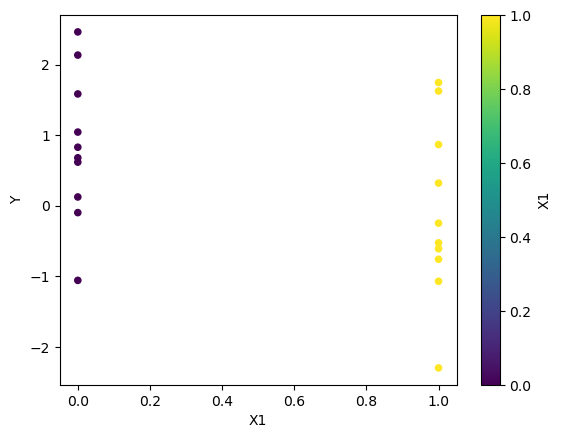

In [160]:
np.random.seed(1)

#generate first sample
X1 = np.random.normal(0,1,10)
X2 = np.random.normal(1,1,10)

#quickly plotting values
df = pd.DataFrame({"X1" : np.repeat([1,0],[len(X1),len(X2)]),
                   "X2" : np.repeat([0,1],[len(X1),len(X2)]), 
                   "Y" : np.concatenate((X1,X2),axis = 0)}) 
df.plot.scatter("X1","Y",c = "X1",cmap = "viridis")

#Computing the F statistic
df["raw_residuals"] = df.Y - np.mean(df.Y)
#df["group_means"] = np.matrix(df[["X1","X2"]]) @ np.matrix(df.groupby("X1").mean().Y).T #manual way
df["group_means"] = df.groupby("X1",axis = 0).transform("mean").Y #pandas way
df["fit_residuals"] = df.Y - df.group_means

print(df)


#calculating the F statistic

#SS(mean)-SS(fit)/(pfit-pmean) / SS(fit)/(n-pfit)
#p = number of parameters ?DOF - 1 in mean, 2 in fit as 2 groups

F = ( (np.sum(df.raw_residuals**2) - np.sum(df.fit_residuals**2) ) / (2 - 1) ) / (np.sum(df.fit_residuals**2) / (len(df.Y) - 2) )

print(F)

#manually calculate F p-value
print(np.mean([1 if f > F else 0 for f in np.random.f(1,len(df.Y) - 2,10000)]))

###run a t-test on the sample to compare
##ttest_ind = independent samples
p = stats.ttest_ind(X1,X2, equal_var = True)
print(p)

#IT WORKS!!!



## Anova just introduces more groups

In [164]:
np.random.seed(1)

#generate first sample
X1 = np.random.normal(0,1,10)
X2 = np.random.normal(1,1,10)
X3 = np.random.normal(1.5,1,10)
group_index = np.repeat([1,2,3],[len(X1),len(X2),len(X3)])

#quickly plotting values
df = pd.DataFrame({"group" : group_index,
                   "X1" : group_index == 1,
                   "X2" : group_index == 2,
                   "X3" : group_index == 3, 
                   "Y" : np.concatenate((X1,X2,X3),axis = 0)}) 

#Computing the F statistic
df["raw_residuals"] = df.Y - np.mean(df.Y)
#df["group_means"] = np.matrix(df[["X1","X2","X3"]]) @ np.matrix(df.groupby("group").mean().Y).T #manual way
df["group_means"] = df.groupby("group",axis = 0).transform("mean").Y #pandas way
df["fit_residuals"] = df.Y - df.group_means

print(df)

#calculating the F statistic

#SS(mean)-SS(fit)/(pfit-pmean) / SS(fit)/(n-pfit)
#p = number of parameters ?DOF - 1 in mean, but now 3 in fit as 3 groups

F = ( (np.sum(df.raw_residuals**2) - np.sum(df.fit_residuals**2) ) / (3 - 1) ) / (np.sum(df.fit_residuals**2) / (len(df.Y) - 3) )

print(F)

#manually calculate F p-value
print(np.mean([1 if f > F else 0 for f in np.random.f(3-1,len(df.Y) - 3,1000000)]))

###run a t-test on the sample to compare
##ttest_ind = independent samples
p = stats.f_oneway(X1,X2,X3)
print(p)

#IT WORKS!!!

    group     X1     X2     X3         Y  raw_residuals  group_means  \
0       1   True  False  False  1.624345       0.850951    -0.097141   
1       1   True  False  False -0.611756      -1.385151    -0.097141   
2       1   True  False  False -0.528172      -1.301566    -0.097141   
3       1   True  False  False -1.072969      -1.846363    -0.097141   
4       1   True  False  False  0.865408       0.092013    -0.097141   
5       1   True  False  False -2.301539      -3.074933    -0.097141   
6       1   True  False  False  1.744812       0.971417    -0.097141   
7       1   True  False  False -0.761207      -1.534601    -0.097141   
8       1   True  False  False  0.319039      -0.454355    -0.097141   
9       1   True  False  False -0.249370      -1.022765    -0.097141   
10      2  False   True  False  2.462108       1.688714     0.830412   
11      2  False   True  False -1.060141      -1.833535     0.830412   
12      2  False   True  False  0.677583      -0.095812     0.83